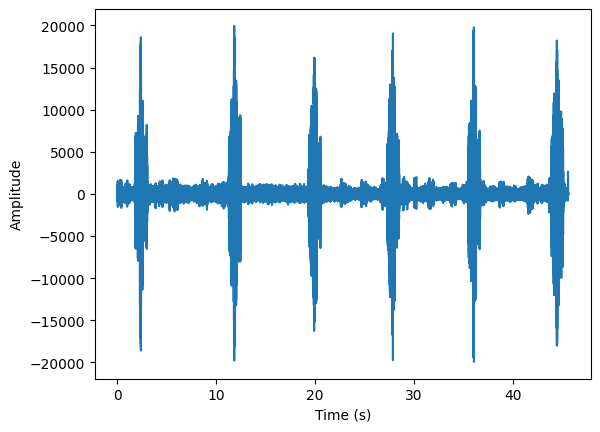

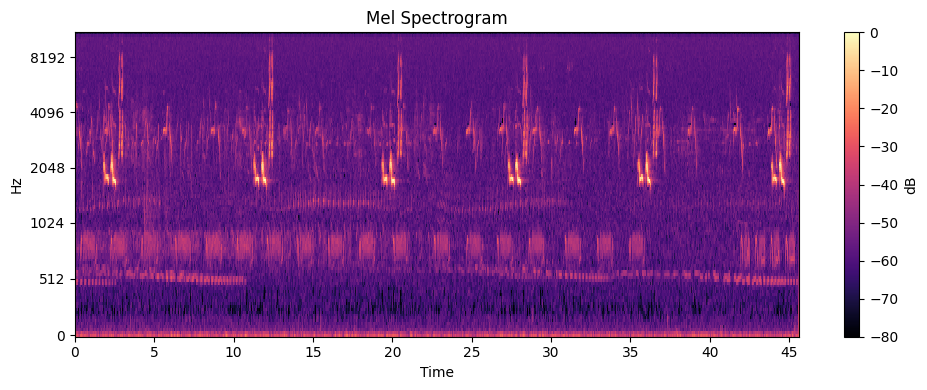

In [ ]:
from pathlib import Path
import librosa
import numpy as np
from matplotlib import pyplot as plt

base = Path.cwd() 
test_file = base / "birdclef-2023/train_audio/abethr1/XC128013.ogg"
ogg, sample_rate = librosa.load(test_file)

# Show audio
from IPython.display import Audio, display
display(Audio(test_file))

# Show time domain
def display_wave(ogg, sample_rate):
    int16 = (ogg * 32767).astype(np.int16)
    time = np.arange(len(int16)) / sample_rate
    plt.plot(time, int16)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    return

display_wave(ogg, sample_rate)


def display_spectogram(ogg, sample_rate):
    # # Convert to dB scale for better visualization
    S = librosa.feature.melspectrogram(y=ogg, sr=sample_rate)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(label='dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()

display_spectogram(ogg, sample_rate)


